In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
def read_excel_sheets(path):
    # Open the excel file
    xl = pd.ExcelFile(path)
    # Create an empty list to store the dataframes
    dfs = []
    # Loop through each sheet in the excel file
    for sheet_name in xl.sheet_names:
        # Read the sheet into a dataframe
        df = pd.read_excel(xl, sheet_name)
        # Add a column with the sheet name
        # First parse the sheet name so it´s a date. It comes in the format: "short month day year"
        if sheet_name[0:4] == "Aprl":
            sheet_name = "April"+sheet_name[4:]
        df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
        # Append the dataframe to the list
        dfs.append(df)
    # Concatenate all the dataframes into a single dataframe
    result = pd.concat(dfs, ignore_index=True)
    return result

In [28]:
dfs = []
xc = ["LUACTRUU Index 2018-2020.xlsx", "LUACTRUU Index 2023-2021.xlsx", "LUACTRUU Index Data (2015-2013).xlsx", "LUUACTRUU Index 2017-2016.xlsx"]
for i in xc:
    dfs.append(read_excel_sheets(i))
data = pd.concat(dfs, ignore_index=True)

data.head()


C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future ve

,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,Issuer,Maturity,Maturity.1,Index Rating (String),BCLASS 2,Cpn,Payment rank,Date,Coupon,payment rank
0,US035242AN64,ABIBB 4.9 02/01/46,USD,112.306,4.146142,15.783,11000000.0,12606689.0,0.245183,4.152812,ANHEUSER-BUSCH INBEV FIN,28.030556,02/01/2046,A3,INDUSTRIAL,4.900,Sr Unsecured,2018-01-19,NaN,NaN
1,US36164QNA21,GE 4.418 11/15/35,USD,103.110,4.168546,12.446,11406510.0,11852241.0,0.230510,4.168546,GE CAPITAL INTL FUNDING,17.819445,11/15/2035,A2,FINANCIAL_INSTITUTIONS,4.418,Sr Preferred,2018-01-19,NaN,NaN
2,US035242AP13,ABIBB 3.65 02/01/26,USD,101.136,3.482374,6.781,11000000.0,11313446.0,0.220031,3.486462,ANHEUSER-BUSCH INBEV FIN,8.030556,02/01/2026,A3,INDUSTRIAL,3.650,Sr Unsecured,2018-01-19,NaN,NaN
3,US035242AJ52,ABIBB 2.65 02/01/21,USD,99.819,2.712440,2.851,7500000.0,7579728.0,0.147415,2.712440,ANHEUSER-BUSCH INBEV FIN,3.030555,02/01/2021,A3,INDUSTRIAL,2.650,Sr Unsecured,2018-01-19,NaN,NaN
4,US38141GFD16,GS 6 ¾ 10/01/37,USD,130.954,4.386269,12.018,5545000.0,7374725.0,0.143428,4.386269,GOLDMAN SACHS GROUP INC,19.697222,10/01/2037,BAA2,FINANCIAL_INSTITUTIONS,6.750,Subordinated,2018-01-19,NaN,NaN


In [ ]:
# merge two columns, Payment Rank and Payment rank into the same column named Payment Rank. Then remove Payment rank
data['Payment Rank'] = data['Payment rank'].fillna(data['payment rank'])
data = data.drop(columns=['Payment rank', 'payment rank'])
# now merge the columns ISIN and Unnamed: 0 into the same column named ISIN. Then remove Unnamed: 0
data['Cpn'] = data['Cpn'].fillna(data['Coupon'])
data = data.drop(columns=['Coupon'])

data = data.rename(columns={'Maturity.1': 'Maturity Date'})

data.to_csv('LUACTRUU.csv', index=False)

# Prueba de concepto

In [6]:

data = pd.read_csv('LUACTRUU.csv')

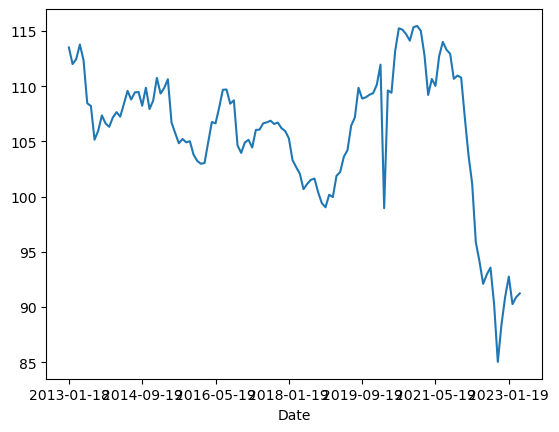

In [11]:
# now create a subset of data with only a few unique ISINs. About 5%
data_subset = data.sample(frac=0.5, replace=False, random_state=1)


# now create a plot of the date and average price for each date. Also add a line for the average price for all dates and all price values
data.groupby('Date')['Price'].mean().plot()
plt.show()

# now create a new df with the average price for each date
data_avg = data.groupby('Date')['Price'].mean().reset_index()


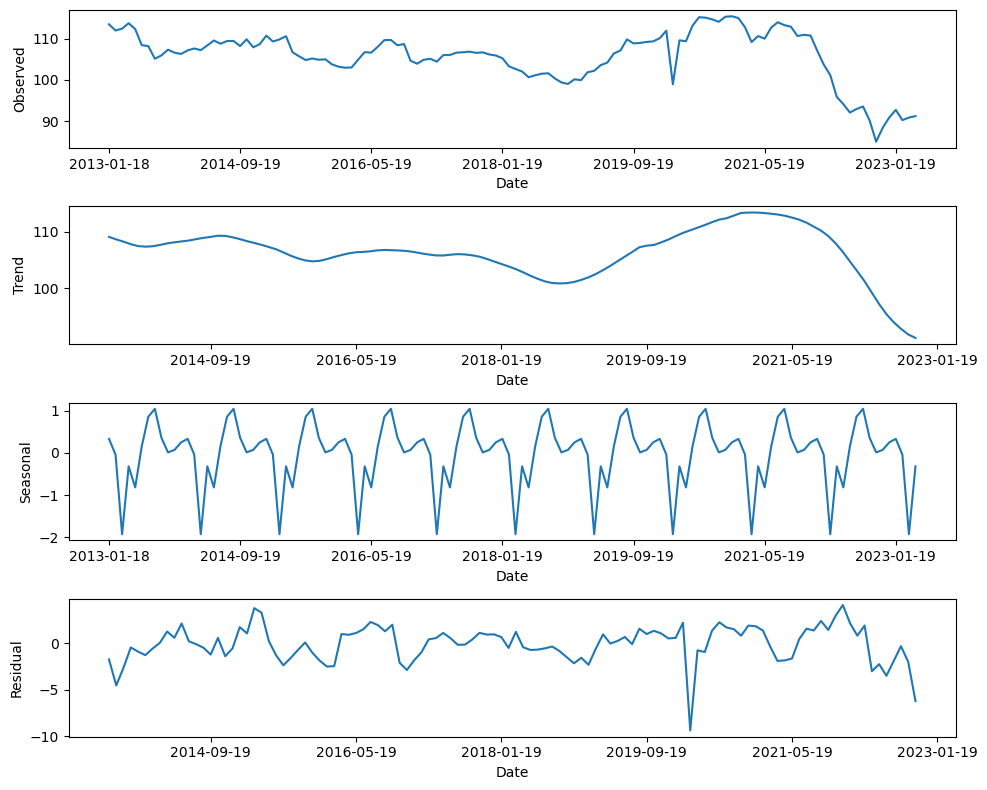

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# set data_avg index to Date
data_avg = data_avg.set_index('Date')

result = seasonal_decompose(data_avg['Price'], model='additive', period=12)

# now plot the result
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [13]:
y = data['Price']
X = data.select_dtypes(include='number').drop(columns=['Price'])

# now scale the data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

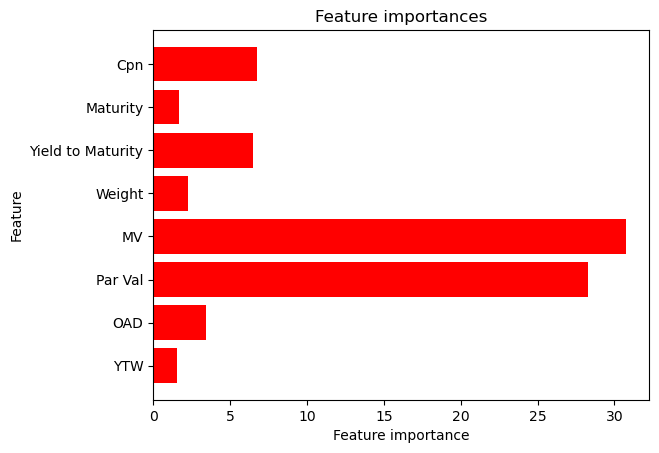

In [14]:
# create a linear regression model
model = LinearRegression()

model.fit(X_scaled, y)

# absolute value of coefficients
coefs = pd.Series(abs(model.coef_))

plt.figure()
plt.title("Feature importances")
plt.barh(X.columns, coefs, color="r", align="center")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [15]:
data.head()

,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,Issuer,Maturity,Maturity Date,Index Rating (String),BCLASS 2,Cpn,Date,Payment Rank
0,US035242AN64,ABIBB 4.9 02/01/46,USD,112.306,4.146142,15.783,11000000.0,12606689.0,0.245183,4.152812,ANHEUSER-BUSCH INBEV FIN,28.030556,02/01/2046,A3,INDUSTRIAL,4.900,2018-01-19,Sr Unsecured
1,US36164QNA21,GE 4.418 11/15/35,USD,103.110,4.168546,12.446,11406510.0,11852241.0,0.230510,4.168546,GE CAPITAL INTL FUNDING,17.819445,11/15/2035,A2,FINANCIAL_INSTITUTIONS,4.418,2018-01-19,Sr Preferred
2,US035242AP13,ABIBB 3.65 02/01/26,USD,101.136,3.482374,6.781,11000000.0,11313446.0,0.220031,3.486462,ANHEUSER-BUSCH INBEV FIN,8.030556,02/01/2026,A3,INDUSTRIAL,3.650,2018-01-19,Sr Unsecured
3,US035242AJ52,ABIBB 2.65 02/01/21,USD,99.819,2.712440,2.851,7500000.0,7579728.0,0.147415,2.712440,ANHEUSER-BUSCH INBEV FIN,3.030555,02/01/2021,A3,INDUSTRIAL,2.650,2018-01-19,Sr Unsecured
4,US38141GFD16,GS 6 ¾ 10/01/37,USD,130.954,4.386269,12.018,5545000.0,7374725.0,0.143428,4.386269,GOLDMAN SACHS GROUP INC,19.697222,10/01/2037,BAA2,FINANCIAL_INSTITUTIONS,6.750,2018-01-19,Subordinated


In [32]:
# Using the price, for each ISIN, calculate the return using the formula: (Price(t) - Price(t-1)) / Price(t-1)
# First, sort the data by ISIN and Date
data = data.sort_values(['ISIN', 'Date'])
data['R1M'] = data.groupby('ISIN')['Price'].pct_change()
data['R3M'] = data.groupby('ISIN')['Price'].pct_change(3)
data['R6M'] = data.groupby('ISIN')['Price'].pct_change(6)
data['R12M'] = data.groupby('ISIN')['Price'].pct_change(12)

In [37]:
data.head(20)


,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,...,Maturity Date,Index Rating (String),BCLASS 2,Cpn,Date,Payment Rank,R1M,R3M,R6M,R12M
594767,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,101.210472,1.334543,4.163824,500000.0,507654.789449,0.013924,1.334543,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-01-18,Sr Unsecured,NaN,NaN,NaN,NaN
590282,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,100.662544,1.462118,4.076623,500000.0,505614.806528,0.013859,1.462118,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-02-19,Sr Unsecured,-0.005414,NaN,NaN,NaN
585758,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,101.141998,1.339931,3.999062,500000.0,508689.156752,0.013841,1.339931,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-03-19,Sr Unsecured,0.004763,NaN,NaN,NaN
581219,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,101.486862,1.247287,3.912658,500000.0,511090.560213,0.013670,1.247287,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-04-19,Sr Unsecured,0.003410,0.002731,NaN,NaN
576601,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,100.940826,1.380695,3.868244,500000.0,508992.329016,0.013675,1.380695,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-05-17,Sr Unsecured,-0.005380,0.002765,NaN,NaN
571935,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,99.416649,1.780875,3.780902,500000.0,498031.162896,0.013802,1.780875,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-06-19,Sr Unsecured,-0.015100,-0.017059,NaN,NaN
567285,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,99.895287,1.653404,3.699845,500000.0,501101.429950,0.013893,1.653404,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-07-19,Sr Unsecured,0.004814,-0.015683,-0.012995,NaN
562601,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,98.793404,1.963062,3.616128,500000.0,496269.102030,0.014053,1.963062,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-08-19,Sr Unsecured,-0.011030,-0.021274,-0.018568,NaN
557926,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,99.463814,1.777792,3.530084,500000.0,500298.229242,0.013979,1.777792,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-09-19,Sr Unsecured,0.006786,0.000474,-0.016592,NaN
553226,US00037BAA08,ABBNVX 1 ⅝ 05/08/17,USD,100.123886,1.588877,3.448392,500000.0,504253.109663,0.013634,1.588877,...,05/08/2017,A2,INDUSTRIAL,1.625,2013-10-18,Sr Unsecured,0.006636,0.002288,-0.013430,NaN
